In [1]:
from rb_model import RbModel
from simulation import RbSim
from net_plot import NetPlot
import copy
import numpy as np
import networkx as nx
from null_model import NullModel

In [2]:
base_model = RbModel(nx.Graph())
base_model.build()
sim_model = copy.deepcopy(base_model)

G = base_model.G

base_plt = NetPlot()
base_plt.G = G

In [3]:
base_model.fc

0.6384720327421556

In [4]:
base_model.stats()

STATS
BEFORE ATTACK
Number of connected components: 1
Size of the largest connected component: 190
clustering coefficient: 0.201077694235589, shortest path per component: [8.322584238373713]


In [5]:
nx.number_of_nodes(G)

190

In [6]:
nx.number_of_edges(G)

265

In [7]:
nx.density(G)

0.014759120022277916

In [8]:
nx.diameter(G)

21

In [9]:
base_model.k_avg

2.789473684210526

In [10]:
nx.number_connected_components(G)

1

In [11]:
nx.average_shortest_path_length(G)

8.322584238373713

In [12]:
base_model.k_avg

2.789473684210526

In [13]:
degrees = [G.degree(n) for n in G.nodes()]
kmin = min(degrees)
kmax = max(degrees)
print(kmin)
print(kmax)

1
9


In [14]:
nx.degree_assortativity_coefficient(G)

-0.12072165296320875

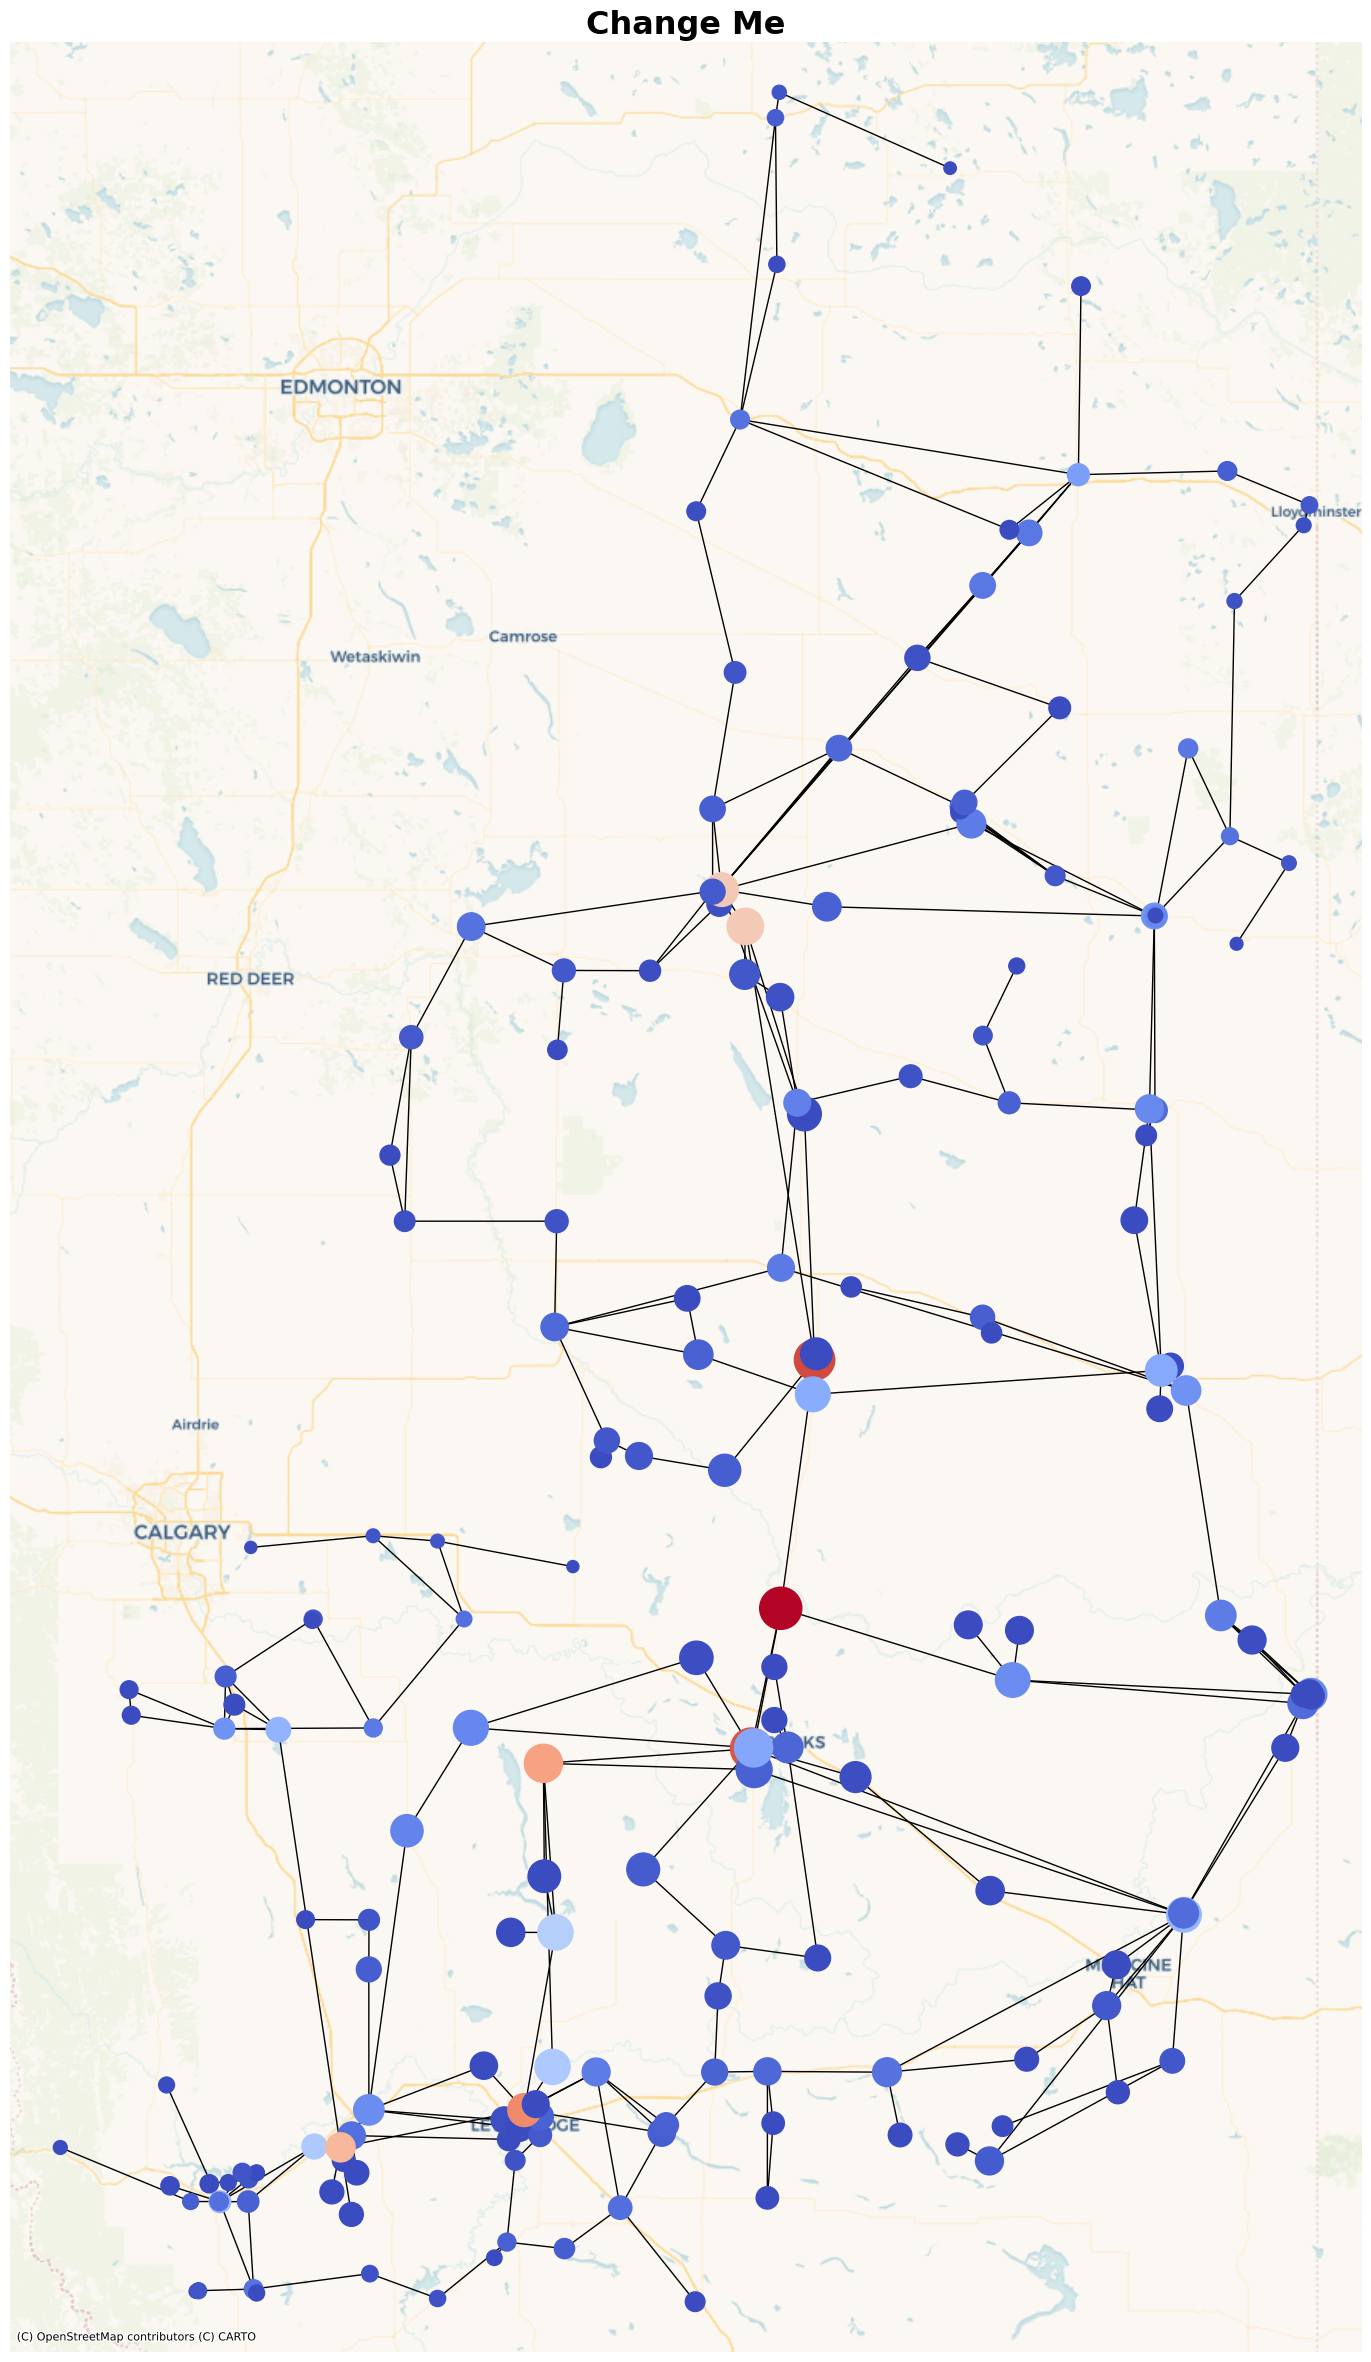

In [16]:
base_plt.plot_network()

In [17]:
base_plt.gdf_nodes.head(2)

,geometry
321S,POINT (-12325411.474 6457026.222)
163S,POINT (-12248109.305 6564556.741)


In [18]:
null_model = NullModel(base_model)
null_model.pos_mercator = copy.deepcopy(base_plt.pos_mercator)

In [19]:
null_model.radius = 77147
null_model.build()
sim_null_model = copy.deepcopy(null_model)

In [20]:
null_model.fc

0.9358974358974359

Comparison of the diameter of the base network vs the random network

In [21]:
nx.diameter(null_model.G)

21

In [22]:
np.log(np.log(nx.number_of_nodes(G)))

1.657661072489074

In [23]:
nx.diameter(null_model.rgg)

18

In [24]:
sim = RbSim(sim_model, sim_null_model)

In [25]:
sim.level = 1
sim.nplt = NetPlot()
sim.nplt.G = sim_model.G
sim.nplt.GN = sim_null_model.G
sim.nplt.RGG = sim_null_model.rgg
sim.nplt.save = True

In [26]:
sim_model.k_avg

2.789473684210526

In [27]:
sim_null_model.k_avg

11.947368421052632

In [28]:
sim.nplt.GN

In [29]:
sim.run_sim_random(1)

run: 0
null 0: Fc: 0.94, lg_con_comp: 190, <k>=11.9474
attacking: null Graph with 190 nodes and 265 edges
remove g
remove rgg
189 189 189 189 189
null 1: Fc: 0.94, lg_con_comp: 189, <k>=11.8519
attacking: null Graph with 189 nodes and 262 edges
remove g
remove rgg
188 188 188 188 188
null 2: Fc: 0.94, lg_con_comp: 188, <k>=11.734
attacking: null Graph with 188 nodes and 260 edges
remove g
remove rgg
187 187 187 187 187
null 3: Fc: 0.94, lg_con_comp: 187, <k>=11.7433
attacking: null Graph with 187 nodes and 258 edges
remove g
remove rgg
186 186 186 186 186
null 4: Fc: 0.94, lg_con_comp: 186, <k>=11.7527
attacking: null Graph with 186 nodes and 257 edges
remove g
remove rgg
185 185 185 185 185
null 5: Fc: 0.94, lg_con_comp: 185, <k>=11.6865
attacking: null Graph with 185 nodes and 253 edges
remove g
remove rgg
184 184 184 184 184
null 6: Fc: 0.94, lg_con_comp: 184, <k>=11.6196
attacking: null Graph with 184 nodes and 248 edges
remove g
remove rgg
183 183 183 183 183
null 7: Fc: 0.94, lg_

TypeError: NetPlot.log_plot() takes 2 positional arguments but 3 were given

In [30]:
sim.model.build()

In [31]:
sim.run_sim_target_btwn()

run: 0
null 0: Crit_Thres: 0.94, % removed(0.0) lg_con_comp: 190, k_avg:11.9474
attacking: null Graph with 190 nodes and 265 edges
189 189 189 189 189
null 1: Crit_Thres: 0.94, % removed(1.0) lg_con_comp: 189, k_avg:11.8942
attacking: null Graph with 189 nodes and 263 edges
188 188 188 188 188
null 2: Crit_Thres: 0.94, % removed(1.0) lg_con_comp: 188, k_avg:11.883
attacking: null Graph with 188 nodes and 262 edges
187 187 187 187 187
null 3: Crit_Thres: 0.94, % removed(2.0) lg_con_comp: 108, k_avg:11.8717
attacking: null Graph with 187 nodes and 260 edges
186 186 186 186 186
null 4: Crit_Thres: 0.94, % removed(2.0) lg_con_comp: 98, k_avg:11.871
attacking: null Graph with 186 nodes and 256 edges
185 185 185 185 185
null 5: Crit_Thres: 0.94, % removed(3.0) lg_con_comp: 98, k_avg:11.7297
attacking: null Graph with 185 nodes and 254 edges
184 184 184 184 184
null 6: Crit_Thres: 0.94, % removed(3.0) lg_con_comp: 98, k_avg:11.6413
attacking: null Graph with 184 nodes and 251 edges
183 183 18

In [ ]:
sim.stats()

In [ ]:
sim_plt.plot_network(sim.title)

In [ ]:
sim.random_attack()

In [ ]:
sim.stats()

In [ ]:
sim_plt.plot_network(sim.title)

In [ ]:
sim.random_attack()

In [ ]:
sim.stats()

In [ ]:
sim_plt.plot_network(sim.title)

$$ Subcritical: \: p \lt \frac{1}{n}, \: <k> \lt 1 \\ Critical: \: p=\frac{1}{n}, \: <k> = 1 \\ Supercritical: \: p \gt \frac{1}{n}, \: <k> \gt 1 $$

In [33]:
10**-2

0.01